In [213]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check Hardware and Tools

In [214]:
import tensorflow as tf
tf.__version__

'1.3.0'

In [215]:
from tensorflow.python.client import device_lib
for d in device_lib.list_local_devices():
    print(d)

name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8138398774840459909

name: "/gpu:0"
device_type: "GPU"
memory_limit: 268173312
locality {
  bus_id: 1
}
incarnation: 13112253324732637779
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0"



# Train U-Net

In [216]:
from unet.data import *
from unet.model import *

In [217]:
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')
train_gen = train_generator(batch_size=2,
                       train_path='data/membrane/train',
                       image_folder='image', mask_folder='label',
                       aug_dict=data_gen_args,
                       save_to_dir=None)

In [200]:
model = unet(input_size=(256, 256, 1))
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss', verbose=1, save_best_only=True)
model.fit_generator(train_gen, steps_per_epoch=300, epochs=5, callbacks=[model_checkpoint])

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
300/300 [==============================] - 184s - loss: 0.3161 - acc: 0.8520   
Epoch 2/5
300/300 [==============================] - 183s - loss: 0.2140 - acc: 0.9080   
Epoch 3/5
300/300 [==============================] - 183s - loss: 0.1858 - acc: 0.9195   
Epoch 4/5
300/300 [==============================] - 183s - loss: 0.1696 - acc: 0.9261   
Epoch 5/5
300/300 [==============================] - 183s - loss: 0.1587 - acc: 0.9305   


# Test and Check

In [218]:
test_gen = test_generator("data/membrane/test")
# results = model.predict_generator((img for img in images), steps=30, verbose=1)
results = [model.predict(batch, batch_size=1, verbose=0)[0,:,:,0]
           for batch in test_gen]
save_result("data/membrane/test_pred", results)

1/1 [==============================] - 0s


/home/ubuntu/src/anaconda3/envs/unet-off/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [219]:
from matplotlib import pyplot as plt
%matplotlib inline

In [220]:
img = results[0].squeeze()
img

array([[ 0.94290096,  0.98946756,  0.99720722, ...,  0.91044164,
         0.85785997,  0.77408457],
       [ 0.98922044,  0.99911505,  0.99977094, ...,  0.88992965,
         0.85903138,  0.69019926],
       [ 0.99596053,  0.99956125,  0.99985397, ...,  0.79934525,
         0.66660392,  0.45642859],
       ..., 
       [ 0.96532494,  0.96595073,  0.80701011, ...,  0.99840802,
         0.99700159,  0.98834491],
       [ 0.92170364,  0.95530003,  0.93154663, ...,  0.99740559,
         0.99637222,  0.98583502],
       [ 0.85767967,  0.91753381,  0.92494732, ...,  0.98505372,
         0.97845197,  0.9296208 ]], dtype=float32)

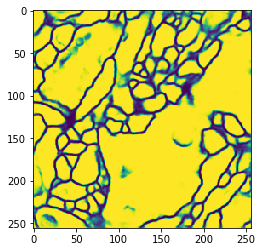

In [221]:
plt.imshow(img)

In [222]:
import skimage

In [223]:
img = skimage.io.imread('data/membrane/test_pred/0_predict.png')

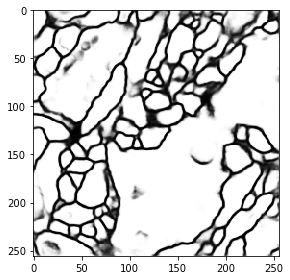

In [224]:
skimage.io.imshow(img)